<a href="" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
file_train = pd.read_csv("sample_data/hindi_train.tsv", sep='\t')

In [ ]:
file_train.head()

,text,label
0,तो,B-repeat_R
1,तो,B-Alteration
2,final,O
3,year,O
4,ही,O


In [ ]:
file_val = pd.read_csv("sample_data/hindi_dev.tsv", sep='\t')
file_val.head()

,text,label
0,hi,O
1,कमला,O
2,कैसी,O
3,है,O
4,?,O


In [ ]:
file_test = pd.read_csv("sample_data/hindi_test_blind.tsv", sep='\t')
file_test.head()

,text
0,अः
1,रीना
2,जी
3,sorry
4,आपको


In [ ]:
file_test['label'] = 0

In [ ]:
possible_labels = file_train.label.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'B-repeat_R': 0,
 'B-Alteration': 1,
 'O': 2,
 'B-false_R': 3,
 'I-false_R': 4,
 'B-edit_R': 5,
 'I-edit_R': 6,
 'B-pet_R': 7,
 'B-filler_R': 8,
 'B-repair_R': 9,
 'I-repair_R': 10,
 'I-repeat_R': 11,
 'I-Alteration': 12,
 'I-pet_R': 13}

In [ ]:
label_names = file_train.label.unique()
label_names

array(['B-repeat_R', 'B-Alteration', 'O', 'B-false_R', 'I-false_R',
       'B-edit_R', 'I-edit_R', 'B-pet_R', 'B-filler_R', 'B-repair_R',
       'I-repair_R', 'I-repeat_R', 'I-Alteration', 'I-pet_R'],
      dtype=object)

In [ ]:
file_train['label'] =file_train.label.replace(label_dict)
file_val['label'] =file_val.label.replace(label_dict)

In [ ]:
file_train.head()

,text,label
0,तो,0
1,तो,1
2,final,2
3,year,2
4,ही,2


In [ ]:
file_val.head()

,text,label
0,hi,2
1,कमला,2
2,कैसी,2
3,है,2
4,?,2


In [ ]:
file_test.head()

,text,label
0,अः,0
1,रीना,0
2,जी,0
3,sorry,0
4,आपको,0


In [ ]:
train_df = file_train
valid_df = file_val


In [ ]:
test_df = file_test

In [ ]:
train_df.shape


(86944, 2)

In [ ]:
valid_df.shape

(7545, 2)

In [ ]:
test_df.shape

(23364, 2)

In [ ]:
train_df['label'].value_counts()

2     76518
1      3014
7      1495
8      1432
10     1279
4       596
12      537
13      363
3       314
0       308
11      293
5       290
9       256
6       249
Name: label, dtype: int64

In [ ]:
valid_df['label'].value_counts()

2     6643
1      227
8      159
7      105
10      79
12      72
4       64
11      47
0       33
3       32
5       32
9       26
6       21
13       5
Name: label, dtype: int64

In [ ]:
test_df['label'].value_counts()

0    23364
Name: label, dtype: int64

In [ ]:
from transformers import BertTokenizer
PRETRAINED_LM = "l3cube-pune/hing-mbert"
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_LM)
tokenizer

# l3cube-pune/hing-roberta-mixed
# l3cube-pune/hing-gpt-devanagari
# l3cube-pune/hing-mbert-mixed

tokenizer_config.json:   0%|          | 0.00/327 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

BertTokenizer(name_or_path='l3cube-pune/hing-mbert', vocab_size=119547, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
def encode(docs):
    '''
    This function takes list of texts and returns input_ids and attention_mask of texts
    '''
    encoded_dict = tokenizer.batch_encode_plus(docs, add_special_tokens=True, max_length=128, padding='max_length',
                            return_attention_mask=True, truncation=True, return_tensors='pt')
    input_ids = encoded_dict['input_ids']
    attention_masks = encoded_dict['attention_mask']
    return input_ids, attention_masks

In [ ]:
valid_df.shape

(7545, 2)

In [ ]:
train_input_ids, train_att_masks = encode(train_df['text'].values.tolist())
valid_input_ids, valid_att_masks = encode(valid_df['text'].values.tolist())


In [ ]:
valid_input_ids.size(), valid_att_masks.size()

(torch.Size([7545, 128]), torch.Size([7545, 128]))

In [ ]:
train_df['text']

0           तो
1           तो
2        final
3         year
4           ही
         ...  
86939       की
86940     चाबी
86941       दे
86942       दी
86943        ।
Name: text, Length: 86944, dtype: object

In [ ]:
test_df.head()

,text,label
0,अः,0
1,रीना,0
2,जी,0
3,sorry,0
4,आपको,0


In [ ]:
test_df['text']

0           अः
1         रीना
2           जी
3        sorry
4         आपको
         ...  
23359        ,
23360     Okay
23361      भाई
23362    thank
23363      you
Name: text, Length: 23364, dtype: object

In [ ]:
test_df['text'].fillna(" ",inplace = True)
test_input_ids, test_att_masks = encode(test_df['text'].values.tolist())

In [ ]:
import torch
train_y = torch.LongTensor(train_df['label'].values.tolist())
valid_y = torch.LongTensor(valid_df['label'].values.tolist())
train_y.size(),valid_y.size()

(torch.Size([86944]), torch.Size([7545]))

In [ ]:
test_y = torch.LongTensor(test_df['label'].values.tolist())
test_y.size()

torch.Size([23364])

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

BATCH_SIZE = 4
train_dataset = TensorDataset(train_input_ids, train_att_masks, train_y)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)



In [ ]:
train_input_ids.shape, train_att_masks.shape, train_y.shape

(torch.Size([86944, 128]), torch.Size([86944, 128]), torch.Size([86944]))

In [ ]:
valid_input_ids.shape,valid_att_masks.shape,valid_y.shape

(torch.Size([7545, 128]), torch.Size([7545, 128]), torch.Size([7545]))

In [ ]:
valid_dataset = TensorDataset(valid_input_ids, valid_att_masks, valid_y)
valid_sampler = SequentialSampler(valid_dataset)
valid_dataloader = DataLoader(valid_dataset, sampler=valid_sampler, batch_size=BATCH_SIZE)

In [ ]:
test_dataset = TensorDataset(test_input_ids, test_att_masks, test_y)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)

In [ ]:
from transformers import BertForSequenceClassification
N_labels = len(train_df.label.unique())
model = BertForSequenceClassification.from_pretrained(PRETRAINED_LM,
                                                      num_labels=N_labels,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

config.json:   0%|          | 0.00/861 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/712M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at l3cube-pune/hing-mbert and are newly initialized: ['classifier.weight', 'classifier.bias', 'bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model = model.cuda()

In [ ]:
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

EPOCHS = 4
LEARNING_RATE = 2e-6

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_linear_schedule_with_warmup(optimizer,
             num_warmup_steps=0,
            num_training_steps=len(train_dataloader)*EPOCHS )

In [ ]:
from torch.nn.utils import clip_grad_norm_
from tqdm.notebook import tqdm
import numpy as np
import math

train_loss_per_epoch = []
val_loss_per_epoch = []


for epoch_num in range(EPOCHS):
    print('Epoch: ', epoch_num + 1)
    '''
    Training
    '''
    model.train()
    train_loss = 0
    for step_num, batch_data in enumerate(tqdm(train_dataloader,desc='Training')):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        loss = output.loss
        train_loss += loss.item()

        model.zero_grad()
        loss.backward()
        del loss

        clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

    train_loss_per_epoch.append(train_loss / (step_num + 1))


    '''
    Validation
    '''
    model.eval()
    valid_loss = 0
    valid_pred = []
    with torch.no_grad():
        for step_num_e, batch_data in enumerate(tqdm(valid_dataloader,desc='Validation')):
            input_ids, att_mask, labels = [data.to(device) for data in batch_data]
            output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

            loss = output.loss
            valid_loss += loss.item()

            valid_pred.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))

    val_loss_per_epoch.append(valid_loss / (step_num_e + 1))
    valid_pred = np.concatenate(valid_pred)

    '''
    Loss message
    '''
    print("{0}/{1} train loss: {2} ".format(step_num+1, math.ceil(len(train_df) / BATCH_SIZE), train_loss / (step_num + 1)))
    print("{0}/{1} val loss: {2} ".format(step_num_e+1, math.ceil(len(valid_df) / BATCH_SIZE), valid_loss / (step_num_e + 1)))

Epoch:  1


Training:   0%|          | 0/21736 [00:00<?, ?it/s]

Validation:   0%|          | 0/1887 [00:00<?, ?it/s]

21736/21736 train loss: 0.5946255134439858 
1887/1887 val loss: 0.5585412819791836 
Epoch:  2


Training:   0%|          | 0/21736 [00:00<?, ?it/s]

Validation:   0%|          | 0/1887 [00:00<?, ?it/s]

21736/21736 train loss: 0.5222708140986417 
1887/1887 val loss: 0.5399007108094587 
Epoch:  3


Training:   0%|          | 0/21736 [00:00<?, ?it/s]

Validation:   0%|          | 0/1887 [00:00<?, ?it/s]

21736/21736 train loss: 0.5128016096471154 
1887/1887 val loss: 0.5480801895664038 
Epoch:  4


Training:   0%|          | 0/21736 [00:00<?, ?it/s]

Validation:   0%|          | 0/1887 [00:00<?, ?it/s]

21736/21736 train loss: 0.5084534450754216 
1887/1887 val loss: 0.5396380151654572 


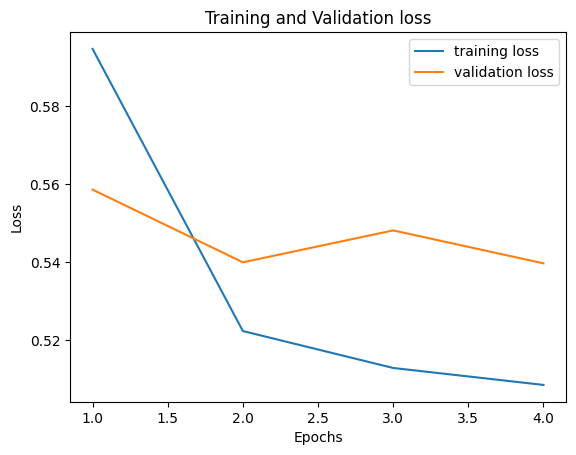

In [ ]:
from matplotlib import pyplot as plt
epochs = range(1, EPOCHS +1 )
fig, ax = plt.subplots()
ax.plot(epochs,train_loss_per_epoch,label ='training loss')
ax.plot(epochs, val_loss_per_epoch, label = 'validation loss' )
ax.set_title('Training and Validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

In [ ]:
#validation performance metrics
from sklearn.metrics import classification_report
print('classifiation report')
print(classification_report(valid_pred, valid_df['label'].to_numpy(), target_names=label_names))

classifiation report
              precision    recall  f1-score   support

  B-repeat_R       0.00      0.00      0.00         0
B-Alteration       0.00      0.00      0.00         0
           O       1.00      0.92      0.96      7197
   B-false_R       0.00      0.00      0.00         0
   I-false_R       0.00      0.00      0.00         0
    B-edit_R       0.25      1.00      0.40         8
    I-edit_R       0.14      1.00      0.25         3
     B-pet_R       0.81      0.89      0.85        95
  B-filler_R       1.00      0.89      0.94       178
  B-repair_R       0.00      0.00      0.00         0
  I-repair_R       0.32      0.42      0.36        59
  I-repeat_R       0.00      0.00      0.00         0
I-Alteration       0.00      0.00      0.00         0
     I-pet_R       0.20      0.20      0.20         5

    accuracy                           0.92      7545
   macro avg       0.27      0.38      0.28      7545
weighted avg       0.99      0.92      0.95      7545



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#ERROR ANALYSIS IF NEEDED
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels=None):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

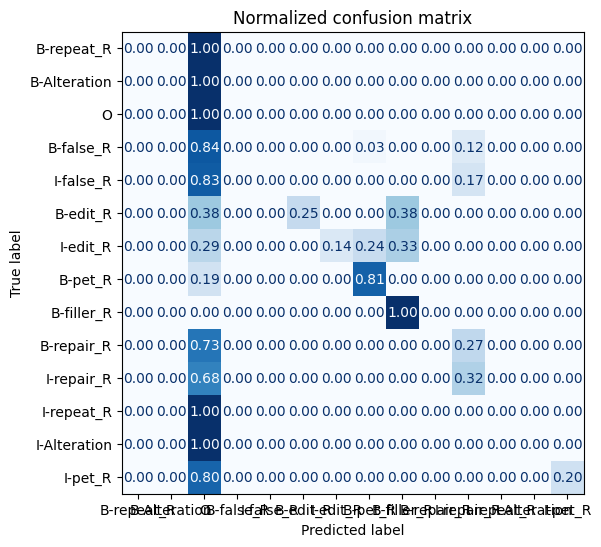

In [ ]:
plot_confusion_matrix(valid_pred,valid_df['label'].to_numpy(),labels=label_names)

In [ ]:
model.eval()
test_pred = []
test_loss= 0
with torch.no_grad():
    for step_num, batch_data in tqdm(enumerate(test_dataloader)):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        loss = output.loss
        test_loss += loss.item()

        test_pred.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))
test_pred = np.concatenate(test_pred)

0it [00:00, ?it/s]

In [ ]:
predicted_output_for_test = test_pred

In [ ]:
file_test['text'].head()

0       अः
1     रीना
2       जी
3    sorry
4     आपको
Name: text, dtype: object

In [ ]:
predicted_output_for_test

array([8, 2, 2, ..., 2, 2, 2])

In [ ]:
file_test['predicted_label'] = predicted_output_for_test.tolist()


In [ ]:
file_test['label']
file_test = file_test.drop('label', axis=1)

In [ ]:
file_test.to_csv('sample_data/DisfluencyResult1.txt', sep='\t', index=False)

In [ ]:
print('classifiation report')
print(classification_report(test_pred, test_df['label'].to_numpy(),target_names=label_names))

In [ ]:
plot_confusion_matrix(test_pred,test_df['label'].to_numpy(),labels=label_names)

In [ ]:
test_df['pred'] = test_pred
test_df.reset_index(level=0)
print(test_df[test_df['label']!=test_df['pred']].shape)
test_df[test_df['label']!=test_df['pred']][['text','label','pred']].head(10)